<a href="https://colab.research.google.com/github/yf4jm/deep-learning/blob/main/simple_neuron_network(IRIS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import torch
import torch.nn as nn
import torch.nn.functional as F

#inherit nn.Module


In [54]:
class Model(nn.Module):
  def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
    super().__init__()
    #interconnecting neurons between each layer
    self.fc1=nn.Linear(in_features,h1)
    # print(self.fc1) #Linear(in_features=4, out_features=8, bias=True)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,out_features)
  def forward(self,x):
    x= F.relu(self.fc1(x))
    x= F.relu(self.fc2(x))
    x= self.out(x)
    return x

#Pick a manual seed for randomization
torch.manual_seed(41)
model = Model()




In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [56]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [57]:
df['variety'] = df['variety'].replace('Setosa',0.0)
df['variety'] = df['variety'].replace('Versicolor',1.0)
df['variety'] = df['variety'].replace('Virginica',2.0)
df


/tmp/ipython-input-3768052573.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['variety'] = df['variety'].replace('Virginica',2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


#Train Test Split, set X,Y

In [58]:
X = df.drop('variety',axis=1).values
y = df['variety'].values

In [59]:
from sklearn.model_selection import train_test_split

In [60]:

#Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)



In [61]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [62]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [63]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [64]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0097211599349976
Epoch: 20 and loss: 0.8162347674369812
Epoch: 30 and loss: 0.585993230342865
Epoch: 40 and loss: 0.4003389775753021
Epoch: 50 and loss: 0.26794716715812683
Epoch: 60 and loss: 0.1796349585056305
Epoch: 70 and loss: 0.12165623158216476
Epoch: 80 and loss: 0.0860651507973671
Epoch: 90 and loss: 0.06522614508867264


Text(0.5, 0, 'Epoch')

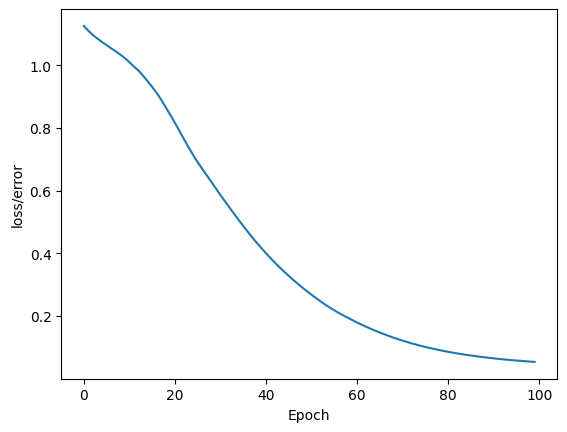

In [65]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

#Evaluation

In [66]:
#we solely want to calculate the loss not make predictions
with torch.no_grad():
  y_eval = model.forward(X_test) #use testing data to try to predict the outputs
  loss = criterion(y_eval, y_test) # calculate the loss
print(loss) #the loss should be close to the loss we got when training otherwise you could change the randomizer seed

tensor(0.1315)


In [67]:
correct = 0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_eval = model.forward(data)
    print(f'{i+1:2}. {str(y_eval):38} {y_test[i]}')
    if y_eval.argmax().item() == y_test[i]:
      correct += 1

print(f'\n{correct} out of {len(y_test)} correct')
print(f'Accuracy: {100*correct/len(y_test)}%')

 1. tensor([-5.8771,  4.4629,  6.5155])    2
 2. tensor([-7.5451,  4.1668,  9.7293])    2
 3. tensor([-8.4517,  5.1275, 10.2015])    2
 4. tensor([-4.3411,  5.6280,  2.5636])    1
 5. tensor([-7.1838,  4.8757,  8.3023])    2
 6. tensor([-3.3940,  5.3421,  1.2802])    1
 7. tensor([-5.9240,  4.9826,  6.0025])    2
 8. tensor([-4.2895,  5.7016,  2.3920])    1
 9. tensor([-6.5369,  4.9261,  7.1291])    2
10. tensor([-8.0526,  4.4129, 10.3325])    2
11. tensor([-5.6775,  4.9505,  5.6248])    2
12. tensor([ 4.5748, -2.2579, -2.8925])    0
13. tensor([ 4.2646, -2.0055, -2.7342])    0
14. tensor([-2.1081,  4.0482,  0.5803])    1
15. tensor([ 3.4608, -1.2147, -2.3488])    0
16. tensor([-5.4739,  5.1174,  5.0966])    2
17. tensor([ 4.0637, -1.8045, -2.6504])    0
18. tensor([-5.8090,  4.6057,  6.2494])    1
19. tensor([ 4.9250, -2.5763, -3.0545])    0
20. tensor([ 3.4559, -1.2559, -2.3637])    0
21. tensor([-2.6161,  4.5584,  0.8575])    1
22. tensor([-7.7427,  4.7379,  9.4233])    2
23. tensor

#Prediction

In [68]:
new_iris = torch.tensor([[5.1,3.5,1.4,0.2]])
with torch.no_grad():
  print(model(new_iris)) #the one with the highest value is what the model predicted and the ouput is the flower of type 0


tensor([[ 4.8061, -2.4691, -2.9990]])


In [69]:
# Save our NN Model
torch.save(model.state_dict(), 'iris_model.pt')

In [70]:
# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [71]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)